In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import bt
from bt.algos import SelectWhere


In [2]:
# download data
data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')
data

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,6.593423,24.105360,29.905264,147.118881,11.001803
2010-01-05,6.604822,24.113148,31.048698,149.719818,11.058768
2010-01-06,6.499765,23.965164,32.016224,148.121780,11.001803
2010-01-07,6.487749,23.715933,32.104191,151.020355,11.571475
2010-01-08,6.530882,23.879499,31.576441,148.164291,11.820707
...,...,...,...,...,...
2021-01-27,142.059998,232.899994,58.897945,273.329987,11.380000
2021-01-28,137.089996,238.929993,59.829998,275.019989,11.090000
2021-01-29,131.960007,231.960007,57.990002,271.170013,10.680000


In [3]:

# calculate moving average DataFrame using pandas' rolling_mean
import pandas as pd
# a rolling mean is a moving average, right?
sma = data.rolling(50).mean()
sma

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-01-27,127.0538,217.787347,58.955454,256.529767,10.771791
2021-01-28,127.4104,218.247054,59.187080,257.672319,10.808761
2021-01-29,127.6436,218.552999,59.347400,258.672231,10.831137


In [4]:
# let's see what the data looks like - this is by no means a pretty chart, but it does the job
plot = bt.merge(data, sma).plot(figsize=(15, 5))

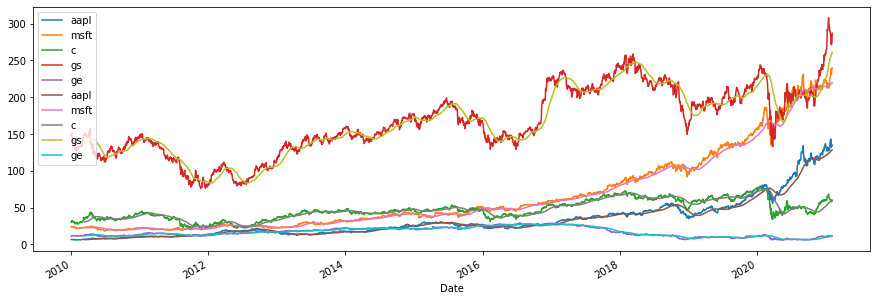

In [9]:
plot.figure

In [ ]:
# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data)

# and let's run it!
res = bt.run(t)